# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
import sys
!{sys.executable} -m pip install gensim

  Using cached https://files.pythonhosted.org/packages/ef/65/c90886ac34d4b12d3ae0bcc7aece1af57e1f30e7138aabbb3e3c027e705a/gensim-3.8.0-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/73/fb/00a976f728d0d1fecfe898238ce23f502a721c0ac0ecfedb80e0d88c64e9/six-1.12.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7a/0e/3781e028d62a8422244582abd8f084e6314297026760587c85607f687bf3/scipy-1.3.1-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/64/7619774f0bd8ef364d46a5df8eb1bc78784cd787324b9624f6793e72f787/numpy-1.17.1-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/23/10/c0b78c27298029e4454a472a1919bde20cb182dab1662cec7f2ca1dcc523/boto-2.49.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 133kB 3.1MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/51/bd/23c926cd341ea6b7dd0b2a00aba99ae0f828be89d72b2190f27c11d4b7

In [1]:
pip install xgboost

  Using cached https://files.pythonhosted.org/packages/c1/24/5fe7237b2eca13ee0cfb100bec8c23f4e69ce9df852a64b0493d49dae4e0/xgboost-0.90-py2.py3-none-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/64/7619774f0bd8ef364d46a5df8eb1bc78784cd787324b9624f6793e72f787/numpy-1.17.1-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/7a/0e/3781e028d62a8422244582abd8f084e6314297026760587c85607f687bf3/scipy-1.3.1-cp35-cp35m-manylinux1_x86_64.whl
Note: you may need to restart the kernel to use updated packages.


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')[:50000]
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date project_grade_category  \
473             GA 2016-04-27 00:53:00          Grades PreK-2   
41558           WA 2016-04-27 01:05:25             Grades 3-5   

      project_subject_categories project_subject_subcategories  \
473             Applied Learning             Early Development   
41558        Literacy & Language                      Literacy   

                                project_title  \
473    Flexible Seating for Flexible Learning   
41558  Going Deep: The Art of Inner Thinking!   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  
473                                               2                    1  
41558                                             2                    1

In [6]:
project_grade_category = []

for i in range(len(project_data)):
    a = project_data["project_grade_category"][i].replace(" ", "_")
    project_grade_category.append(a)
    
project_data.drop(['project_grade_category'], axis=1, inplace=True)
project_data["project_grade_category"] = project_grade_category
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   
29891      146723  p099708  c0a28c79fe8ad5810da49de47b3fb491           Mrs.   
23374       72317  p087808  598621c141cda5fb184ee7e8ccdd3fcc            Ms.   
49228       57854  p099430  4000cfe0c8b2df75a218347c1765e283            Ms.   

      school_state                Date        project_subject_categories  \
473             GA 2016-04-27 00:53:00                  Applied Learning   
41558           WA 2016-04-27 01:05:25               Literacy & Language   
29891           CA 2016-04-27 01:10:09  Math & Science, History & Civics   
23374           CA 2016-04-27 02:04:15               Literacy & Language   
49228           IL 2016-04-27 07:19:44               Literacy & Language   

      project_subject_subcategories                             project_title  \
473               Early Development    Flexible Seating for Flexible Learning   
41558                      Literacy    Going Deep: The Art of Inner Thinking!   
29891  Mathematics, Social Sciences        Breakout Box to Ignite Engagement!   
23374                 ESL, Literacy                         iPad for Learners   
49228                      Literacy  A flexible classroom for flexible minds!   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   
29891  It's the end of the school year. Routines have...   
23374  Never has society so rapidly changed. Technolo...   
49228  My students yearn for a classroom environment ...   

                                         project_essay_2  \
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   
29891  My students desire challenges, movement, and c...   
23374  Our Language Arts and Social Justice Magnet Sc...   
49228  I have the privilege of teaching an incredible...   

                                         project_essay_3  \
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   
29891  I will design different clues using specific c...   
23374  \"Is it my turn, Ms. K? When am I going to be ...   
49228  Ideally, I would love to delve right into \"fl...   

                                         project_essay_4  \
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   
29891  Donations to this project will immediately imp...   
23374  By donating to this project, you will give my ...   
49228  This project will be so beneficial for my stud...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   
29891  My students need items from a \"Breakout Box\"...   
23374                      My students need 1 ipad mini.   
49228  My students need 5 Hokki Stools and an easel o...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
473                                               2                    1   
41558                                             2                    1   
29891                                             6                    1   
23374                                           127                    1   
49228                                             1                    1   

      project_grade_category  
473            Grades_PreK-2  
41558             Grades_6-8  
29891             Grades_6-8  
23374          Grades_PreK-2  
49228          Grades_PreK-2

## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## Clean Titles (Text preprocessing)

In [9]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [10]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [11]:
clean_titles = []

for titles in tqdm(project_data["project_title"]):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(f for f in title.split() if f not in stopwords)
    clean_titles.append(title.lower().strip())

100%|██████████| 50000/50000 [00:01<00:00, 35842.74it/s]


In [12]:
project_data["clean_titles"] = clean_titles

In [13]:
project_data.drop(['project_title'], axis=1, inplace=True)

## Feature "Number of Words in Title"

In [14]:
title_word_count = []
for a in project_data["clean_titles"] :
    b = len(a.split())
    title_word_count.append(b)
    
project_data["title_word_count"] = title_word_count
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   
29891      146723  p099708  c0a28c79fe8ad5810da49de47b3fb491           Mrs.   
23374       72317  p087808  598621c141cda5fb184ee7e8ccdd3fcc            Ms.   
49228       57854  p099430  4000cfe0c8b2df75a218347c1765e283            Ms.   

      school_state                Date  \
473             GA 2016-04-27 00:53:00   
41558           WA 2016-04-27 01:05:25   
29891           CA 2016-04-27 01:10:09   
23374           CA 2016-04-27 02:04:15   
49228           IL 2016-04-27 07:19:44   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   
29891  It's the end of the school year. Routines have...   
23374  Never has society so rapidly changed. Technolo...   
49228  My students yearn for a classroom environment ...   

                                         project_essay_2  \
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   
29891  My students desire challenges, movement, and c...   
23374  Our Language Arts and Social Justice Magnet Sc...   
49228  I have the privilege of teaching an incredible...   

                                         project_essay_3  \
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   
29891  I will design different clues using specific c...   
23374  \"Is it my turn, Ms. K? When am I going to be ...   
49228  Ideally, I would love to delve right into \"fl...   

                                         project_essay_4  \
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   
29891  Donations to this project will immediately imp...   
23374  By donating to this project, you will give my ...   
49228  This project will be so beneficial for my stud...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   
29891  My students need items from a \"Breakout Box\"...   
23374                      My students need 1 ipad mini.   
49228  My students need 5 Hokki Stools and an easel o...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
473                                               2                    1   
41558                                             2                    1   
29891                                             6                    1   
23374                                           127                    1   
49228                                             1                    1   

      project_grade_category             clean_categories  \
473            Grades_PreK-2              AppliedLearning   
41558             Grades_6-8            Literacy_Language   
29891             Grades_6-8  Math_Science History_Civics   
23374          Grades_PreK-2            Literacy_Language   
49228          Grades_PreK-2            Literacy_Language   

              clean_subcategories                         clean_titles  \
473              EarlyDevelopment   flexible seating flexible learning   
41558                    Literacy    going deep the art inner thinking   
29891  Mathematics SocialSciences       breakout box ignite engagement   
23374                ESL Literacy                        ipad learners   
49228                    Literacy  a flexible classroom flexible minds   

       title_word_count  
473                   4  
41558                 6  
29891                 4  
23374                 2  
49228                 5

## 1.3 Text preprocessing

In [15]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [16]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date  \
473             GA 2016-04-27 00:53:00   
41558           WA 2016-04-27 01:05:25   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
473                                               2                    1   
41558                                             2                    1   

      project_grade_category   clean_categories clean_subcategories  \
473            Grades_PreK-2    AppliedLearning    EarlyDevelopment   
41558             Grades_6-8  Literacy_Language            Literacy   

                             clean_titles  title_word_count  \
473    flexible seating flexible learning                 4   
41558   going deep the art inner thinking                 6   

                                                   essay  
473    I recently read an article about giving studen...  
41558  My students crave challenge, they eat obstacle...

## Clean Essays (Text preprocessing)

In [17]:
clean_essay = []

for ess in tqdm(project_data["essay"]):
    ess = decontracted(ess)
    ess = ess.replace('\\r', ' ')
    ess = ess.replace('\\"', ' ')
    ess = ess.replace('\\n', ' ')
    ess = re.sub('[^A-Za-z0-9]+', ' ', ess)
    ess = ' '.join(f for f in ess.split() if f not in stopwords)
    clean_essay.append(ess.lower().strip())

100%|██████████| 50000/50000 [00:32<00:00, 1549.19it/s]


In [18]:
project_data["clean_essays"] = clean_essay

In [19]:
project_data.drop(['essay'], axis=1, inplace=True)

## Number of Words in Essay

In [20]:
essay_word_count = []
for ess in project_data["clean_essays"] :
    c = len(ess.split())
    essay_word_count.append(c)
    
project_data["essay_word_count"] = essay_word_count
    
project_data.head(5)    

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   
29891      146723  p099708  c0a28c79fe8ad5810da49de47b3fb491           Mrs.   
23374       72317  p087808  598621c141cda5fb184ee7e8ccdd3fcc            Ms.   
49228       57854  p099430  4000cfe0c8b2df75a218347c1765e283            Ms.   

      school_state                Date  \
473             GA 2016-04-27 00:53:00   
41558           WA 2016-04-27 01:05:25   
29891           CA 2016-04-27 01:10:09   
23374           CA 2016-04-27 02:04:15   
49228           IL 2016-04-27 07:19:44   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   
29891  It's the end of the school year. Routines have...   
23374  Never has society so rapidly changed. Technolo...   
49228  My students yearn for a classroom environment ...   

                                         project_essay_2  \
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   
29891  My students desire challenges, movement, and c...   
23374  Our Language Arts and Social Justice Magnet Sc...   
49228  I have the privilege of teaching an incredible...   

                                         project_essay_3  \
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   
29891  I will design different clues using specific c...   
23374  \"Is it my turn, Ms. K? When am I going to be ...   
49228  Ideally, I would love to delve right into \"fl...   

                                         project_essay_4  \
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   
29891  Donations to this project will immediately imp...   
23374  By donating to this project, you will give my ...   
49228  This project will be so beneficial for my stud...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   
29891  My students need items from a \"Breakout Box\"...   
23374                      My students need 1 ipad mini.   
49228  My students need 5 Hokki Stools and an easel o...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
473                                               2                    1   
41558                                             2                    1   
29891                                             6                    1   
23374                                           127                    1   
49228                                             1                    1   

      project_grade_category             clean_categories  \
473            Grades_PreK-2              AppliedLearning   
41558             Grades_6-8            Literacy_Language   
29891             Grades_6-8  Math_Science History_Civics   
23374          Grades_PreK-2            Literacy_Language   
49228          Grades_PreK-2            Literacy_Language   

              clean_subcategories                         clean_titles  \
473              EarlyDevelopment   flexible seating flexible learning   
41558                    Literacy    going deep the art inner thinking   
29891  Mathematics SocialSciences       breakout box ignite engagement   
23374                ESL Literacy                        ipad learners   
49228                    Literacy  a flexible classroom flexible minds   

       title_word_count                                       clean_essays  \
473                   4  i recently read article giving students choice...   
41558                 6  my students crave challe

## Train test Split

In [21]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(project_data, project_data['project_is_approved'], test_size=0.33, stratify = project_data['project_is_approved'])
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [22]:
# printing some random reviews
print(project_data['clean_essays'].values[0])
print("="*50)
print(project_data['clean_essays'].values[150])
print("="*50)
print(project_data['clean_essays'].values[1000])
print("="*50)
print(project_data['clean_essays'].values[20000])
print("="*50)


i recently read article giving students choice learn we already set goals not let choose sit give options sit i teach low income title 1 school every year i class range abilities yet age they learn differently different interests some adhd fast learners yet eager active learners want need able move around room yet place comfortable complete work we need classroom rug use class reading time students use learning times i also requested four kore kids wobble chairs four back jack padded portable chairs students still move whole group lessons without disrupting class having areas provide little ones way wiggle working benjamin franklin said tell i forget teach i may remember involve i learn i want children involved learning choice sit learn giving options comfortable flexible seating
at beginning every class start math application problem help students see relevance topics math we always groups lot cooperative activities we also use lots technology class i love seeing students grow love ma

In [23]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [24]:
sent = decontracted(project_data['clean_essays'].values[20000])
print(sent)
print("="*50)

i teach title 1 school 73 students receive free reduced lunch our school provides free breakfast students i special education certified teacher i teach kindergarten general education setting class consists 52 students special needs the disabilities include autism spectrum disorder speech impaired language impaired other health impaired adhd developmentally delayed i also 42 students english language learners self motivated learners synonym students they love learn possess positive outlook attitude school almost everyday students would ask ms perez going learn today i could not ask better greeting students this project greatly impact students learning daily basis the wobble chairs provide assistance students difficulties focusing attending lessons discussions despite fact students participate physical activities p e recess gonoodle dance videos sessions classroom students still energy stand wiggle seats lessons due special needs beyond students control lot distraction student learning n

In [25]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

i teach title 1 school 73 students receive free reduced lunch our school provides free breakfast students i special education certified teacher i teach kindergarten general education setting class consists 52 students special needs the disabilities include autism spectrum disorder speech impaired language impaired other health impaired adhd developmentally delayed i also 42 students english language learners self motivated learners synonym students they love learn possess positive outlook attitude school almost everyday students would ask ms perez going learn today i could not ask better greeting students this project greatly impact students learning daily basis the wobble chairs provide assistance students difficulties focusing attending lessons discussions despite fact students participate physical activities p e recess gonoodle dance videos sessions classroom students still energy stand wiggle seats lessons due special needs beyond students control lot distraction student learning n

In [26]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

i teach title 1 school 73 students receive free reduced lunch our school provides free breakfast students i special education certified teacher i teach kindergarten general education setting class consists 52 students special needs the disabilities include autism spectrum disorder speech impaired language impaired other health impaired adhd developmentally delayed i also 42 students english language learners self motivated learners synonym students they love learn possess positive outlook attitude school almost everyday students would ask ms perez going learn today i could not ask better greeting students this project greatly impact students learning daily basis the wobble chairs provide assistance students difficulties focusing attending lessons discussions despite fact students participate physical activities p e recess gonoodle dance videos sessions classroom students still energy stand wiggle seats lessons due special needs beyond students control lot distraction student learning n

In [27]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

## Preprocessed Train data (Essay)

In [28]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['clean_essays'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_train.append(sent.lower().strip())

100%|██████████| 22445/22445 [00:10<00:00, 2091.06it/s]


In [29]:
# after preprocesing
preprocessed_essays_train[10000]

'students struggling readers year moved new position intervention teacher third fifth grade school students working trying best catch peers students two grade levels academic grade although struggling not lost enthusiasm learning always excited see come class pick working hard get reading math skills back track everyone wants succeed no matter students use building fluency card bank partner increase reading fluency students love time one another watch numbers go use high interest intervention folder set working students small group setting kit addresses several common core state standards students able review practice new math skills common core practice cards wipe pockets excited using nonfiction reading comprehension cards students students love read things interested materials enable help students get back track nannan'

## Preprocessed Test data (Essay)

In [30]:
preprocessed_essays_test = []
# tqdm is for printing the status bar
for sentence in tqdm(X_test['clean_essays'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_test.append(sent.lower().strip())

100%|██████████| 16500/16500 [00:07<00:00, 2101.76it/s]


In [31]:
preprocessed_essays_test[0]

'students come united states although lived neighborhood whole lives 97 students school receive free reduced lunch many overcome obstacles getting school day regardless continue see growth not academically also socially emotionally family units second grade teacher really great chance inspire empower achieve fullest potential well set path help succeed rest lives research shows students multiple learning styles visual auditory kinesthetic etc many students unique learning styles like move learn wobble seats allow students ability rock lean safe way get excess energy learn students use chairs centers biggest movers shakers able get jitters move lessons ensure need movement not impede learning nannan'

## Preprocessed Cross Validation data (essay)

In [32]:
preprocessed_essays_cv = []
# tqdm is for printing the status bar
for sentence in tqdm(X_cv['clean_essays'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_cv.append(sent.lower().strip())

100%|██████████| 11055/11055 [00:05<00:00, 2082.25it/s]


In [33]:
preprocessed_essays_cv[0]

'students classroom extremely hard workers love learning classroom values challenges sees mistakes opportunities learn skills important students academic success community rich culture creativity short money school title 1 school 90 percent families qualifying free reduced meals majority families school spanish speaking many languages overheard hallway conversations parents students materials put use immediately new books cracked open eager students cannot wait get lost story trade books central effectiveness reading workshop model cornerstone engaging texts engaging reading class builds community passion literacy read class sets together meaningful experience students develop language skills time discuss social implications novels basic supplies pencils paper post notebooks make students practice writing classroom nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

## Preprocessing of Project Title for Train data

In [34]:
# similarly you can preprocess the titles also
preprocessed_titles_train = []

for titles in tqdm(X_train["clean_titles"]):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(f for f in title.split() if f not in stopwords)
    preprocessed_titles_train.append(title.lower().strip())

100%|██████████| 22445/22445 [00:00<00:00, 36476.32it/s]


In [35]:
preprocessed_titles_train[0]

'loving language literacy'

## Preprocessing of Project Title for Test data

In [36]:
preprocessed_titles_test = []

for titles in tqdm(X_test["clean_titles"]):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(f for f in title.split() if f not in stopwords)
    preprocessed_titles_test.append(title.lower().strip())

100%|██████████| 16500/16500 [00:00<00:00, 35904.29it/s]


In [37]:
preprocessed_titles_test[0]

'ants pants move learn'

## Preprocessing of Project Title for CV data

In [38]:
preprocessed_titles_cv = []

for titles in tqdm(X_cv["clean_titles"]):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(f for f in title.split() if f not in stopwords)
    preprocessed_titles_cv.append(title.lower().strip())

100%|██████████| 11055/11055 [00:00<00:00, 35914.98it/s]


In [39]:
preprocessed_titles_cv[0]

'books boosting language arts skills'

In [40]:
#Source:https://github.com/roothd17/Donor-Choose-ML/blob/master/Donor%20Choose%20RF%20and%20GBDT.ipynb
def feaDic( alpha, feature, df ):
    
    count = X_train[ feature ].value_counts()
    
    # count :  CA    597        NY    306         TX    289       FL    231       NC    206
    
    featDict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    
    for i, denominator in count.items():   # Here i = CA and deno = 597
       
        vec = []
        
        for j in range(1,3):  # itearte 2 times

            cls_cnt = X_train.loc[ ( X_train['project_is_approved'] == j ) & ( X_train[feature] == i ) ]
            # cls_cnt will return a type(xtr) that will contain Only single features belonging to a single class
            
            # cls_cnt.shape[0] will contain the number of time that particular feature occured in the whole data
            
            vec.append( ( cls_cnt.shape[0] + alpha * 10 ) / ( denominator + 90 * alpha ) )

        # we are adding the feature to the dict as key and vec as value
        featDict[i] = vec
    return featDict

# when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
# (numerator + 10 *alpha) / (denominator + 90 *alpha ) 



def feature( alpha, feature, df ):
   
    featureDict = feaDic( alpha, feature, df ) # Function Call

    count = X_train[feature].value_counts()
    
    # feat :it will contain the feature for each feature value in the data
    feat = []
    
  
    for index, row in df.iterrows():
        
        if row[feature] in dict( count ).keys():
            feat.append( featureDict[ row[feature] ] )
        else:
            feat.append([0.5, 0.05])

    return feat

## 1.5 Preparing data for models

In [41]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'project_grade_category', 'clean_categories', 'clean_subcategories',
       'clean_titles', 'title_word_count', 'clean_essays', 'essay_word_count'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [42]:
alpha = 1 # alpha is used for laplace smoothing

X_train_cc_ohe = np.array( feature( alpha, "clean_categories", X_train) )
X_test_cc_ohe = np.array( feature( alpha, "clean_categories", X_test) )
X_cv_cc_ohe = np.array( feature( alpha, "clean_categories", X_cv) )

print( X_train_cc_ohe.shape )
print( X_test_cc_ohe.shape )
print( X_cv_cc_ohe.shape )


(22445, 2)
(16500, 2)
(11055, 2)


In [43]:
alpha = 1 # alpha is used for laplace smoothing

X_train_csc_ohe = np.array( feature( alpha, "clean_subcategories", X_train) )
X_test_csc_ohe = np.array( feature( alpha, "clean_subcategories", X_test) )
X_cv_csc_ohe = np.array( feature( alpha, "clean_subcategories", X_cv) )

print( X_train_csc_ohe.shape )
print( X_test_csc_ohe.shape )
print( X_cv_csc_ohe.shape )

(22445, 2)
(16500, 2)
(11055, 2)


In [44]:
alpha = 1 # alpha is used for laplace smoothing

X_train_teacher_ohe = np.array( feature( alpha, "teacher_prefix", X_train) )
X_test_teacher_ohe = np.array( feature( alpha, "teacher_prefix", X_test) )
X_cv_teacher_ohe = np.array( feature( alpha, "teacher_prefix", X_cv) )

print( X_train_teacher_ohe.shape )
print( X_test_teacher_ohe.shape )
print( X_cv_teacher_ohe.shape )

(22445, 2)
(16500, 2)
(11055, 2)


In [45]:
alpha = 1 # alpha is used for laplace smoothing

X_train_state_ohe = np.array( feature( alpha, "school_state", X_train) )
X_test_state_ohe = np.array( feature( alpha, "school_state", X_test) )
X_cv_state_ohe = np.array( feature( alpha, "school_state", X_cv) )

print( X_train_state_ohe.shape )
print( X_test_state_ohe.shape )
print( X_cv_state_ohe.shape )

(22445, 2)
(16500, 2)
(11055, 2)


In [46]:
alpha = 1 # alpha is used for laplace smoothing

X_train_grade_ohe = np.array( feature( alpha, "project_grade_category", X_train) )
X_test_grade_ohe = np.array( feature( alpha, "project_grade_category", X_test) )
X_cv_grade_ohe = np.array( feature( alpha, "project_grade_category", X_cv) )

print( X_train_grade_ohe.shape )
print( X_test_grade_ohe.shape )
print( X_cv_grade_ohe.shape )

(22445, 2)
(16500, 2)
(11055, 2)


## a) Bag of words Train Data (Essays)

In [47]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_bow_essay = CountVectorizer(min_df=10)

vectorizer_bow_essay.fit(preprocessed_essays_train)

text_bow_train = vectorizer_bow_essay.transform(preprocessed_essays_train)

print("Shape of matrix after one hot encoding ",text_bow_train.shape)

Shape of matrix after one hot encoding  (22445, 8801)


## b) Bag of words Test Data (Essays)

In [48]:
text_bow_test = vectorizer_bow_essay.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encoding ",text_bow_test.shape)

Shape of matrix after one hot encoding  (16500, 8801)


## c) Bag of words CV Data (Essays)

In [49]:
text_bow_cv = vectorizer_bow_essay.transform(preprocessed_essays_cv)
print("Shape of matrix after one hot encoding ",text_bow_cv.shape)

Shape of matrix after one hot encoding  (11055, 8801)


## d) Bag of words train Data (Titles)

In [50]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
vectorizer_bow_title = CountVectorizer(min_df=10)

vectorizer_bow_title.fit(preprocessed_titles_train)

title_bow_train = vectorizer_bow_title.transform(preprocessed_titles_train)

print("Shape of matrix after one hot encoding ",title_bow_train.shape)

Shape of matrix after one hot encoding  (22445, 1169)


## e) Bag of words Test Data (Titles)

In [51]:
title_bow_test = vectorizer_bow_title.transform(preprocessed_titles_test)
print("Shape of matrix after one hot encoding ",title_bow_test.shape)

Shape of matrix after one hot encoding  (16500, 1169)


## f) Bag of words  Data (Titles)

In [52]:
title_bow_cv = vectorizer_bow_title.transform(preprocessed_titles_cv)
print("Shape of matrix after one hot encoding ",title_bow_cv.shape)

Shape of matrix after one hot encoding  (11055, 1169)


#### 1.5.2.2 TFIDF vectorizer

## a) TFIDF vectorizer Train Data (Essays)

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf_essay = TfidfVectorizer(min_df=10)
vectorizer_tfidf_essay.fit(preprocessed_essays_train)

text_tfidf_train = vectorizer_tfidf_essay.transform(preprocessed_essays_train)

print("Shape of matrix after one hot encoding ",text_tfidf_train.shape)

Shape of matrix after one hot encoding  (22445, 8801)


## b) TFIDF vectorizer Test Data (Essays)

In [54]:
text_tfidf_test = vectorizer_tfidf_essay.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encoding ",text_tfidf_test.shape)

Shape of matrix after one hot encoding  (16500, 8801)


## c) TFIDF vectorizer CV Data (Essays)

In [55]:
text_tfidf_cv = vectorizer_tfidf_essay.transform(preprocessed_essays_cv)
print("Shape of matrix after one hot encoding ",text_tfidf_cv.shape)

Shape of matrix after one hot encoding  (11055, 8801)


## c) TFIDF vectorizer Train Data (Titles)

In [56]:
vectorizer_tfidf_titles = TfidfVectorizer(min_df=10)

vectorizer_tfidf_titles.fit(preprocessed_titles_train)
title_tfidf_train = vectorizer_tfidf_titles.transform(preprocessed_titles_train)

print("Shape of matrix after one hot encoding ",title_tfidf_train.shape)

Shape of matrix after one hot encoding  (22445, 1169)


## d) TFIDF vectorizer Test Data (Titles)

In [57]:
title_tfidf_test = vectorizer_tfidf_titles.transform(preprocessed_titles_test)
print("Shape of matrix after one hot encoding ",title_tfidf_test.shape)

Shape of matrix after one hot encoding  (16500, 1169)


## e) TFIDF vectorizer CV Data (Titles)

In [58]:
title_tfidf_cv = vectorizer_tfidf_titles.transform(preprocessed_titles_cv)
print("Shape of matrix after one hot encoding ",title_tfidf_cv.shape)

Shape of matrix after one hot encoding  (11055, 1169)


# C) Using Pretrained Models : AVG W2V

In [59]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model

model = loadGloveModel('glove.42B.300d.txt')


words = []
for i in preprocessed_essays_train :
    words.extend(i.split(' '))

print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)

Loading Glove Model


FileNotFoundError: [Errno 2] No such file or directory: 'glove.42B.300d.txt'

In [61]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

## Train Essay

In [62]:
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_vectors_train = []; 

for sentence in tqdm(X_train["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))

100%|██████████| 22445/22445 [00:07<00:00, 2920.95it/s]

22445
300


## Test Essay

In [63]:
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_vectors_test = []; 

for sentence in tqdm(X_test["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|██████████| 16500/16500 [00:05<00:00, 2836.91it/s]

16500
300


## Cross validation Essay

In [64]:
avg_w2v_vectors_cv = []; 

for sentence in tqdm(X_cv["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))

100%|██████████| 11055/11055 [00:03<00:00, 2805.02it/s]

11055
300


## train Titles

In [65]:
avg_w2v_vectors_titles_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["clean_titles"]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_train.append(vector)

print(len(avg_w2v_vectors_titles_train))
print(len(avg_w2v_vectors_titles_train[0]))

100%|██████████| 22445/22445 [00:00<00:00, 44249.68it/s]

22445
300


## Test Titles

In [66]:
avg_w2v_vectors_titles_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["clean_titles"]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_test.append(vector)

print(len(avg_w2v_vectors_titles_test))
print(len(avg_w2v_vectors_titles_test[0]))

100%|██████████| 16500/16500 [00:00<00:00, 44507.08it/s]

16500
300


## CV Titles

In [67]:
avg_w2v_vectors_titles_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv["clean_titles"]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_cv.append(vector)

print(len(avg_w2v_vectors_titles_cv))
print(len(avg_w2v_vectors_titles_cv[0]))

100%|██████████| 11055/11055 [00:00<00:00, 42956.59it/s]

11055
300


## D) Using Pretrained Models: TFIDF weighted W2V


## Train - Essays

In [68]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train["clean_essays"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [69]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|██████████| 22445/22445 [00:48<00:00, 465.84it/s]

22445
300


## Test essays

In [70]:
# compute average word2vec for each review.

tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|██████████| 16500/16500 [00:35<00:00, 467.47it/s]

16500
300


## CV essays

In [71]:
# compute average word2vec for each review.

tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))

100%|██████████| 11055/11055 [00:22<00:00, 480.81it/s]

11055
300


## Train Titles

In [72]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train["clean_titles"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [73]:
# compute average word2vec for each review.

tfidf_w2v_vectors_titles_train = []; 

for sentence in tqdm(X_train["clean_titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_train.append(vector)

print(len(tfidf_w2v_vectors_titles_train))
print(len(tfidf_w2v_vectors_titles_train[0]))

100%|██████████| 22445/22445 [00:00<00:00, 22513.14it/s]

22445
300


## Test Titles

In [74]:
# compute average word2vec for each review.

tfidf_w2v_vectors_titles_test = []; 

for sentence in tqdm(X_test["clean_titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_test.append(vector)

print(len(tfidf_w2v_vectors_titles_test))
print(len(tfidf_w2v_vectors_titles_test[0]))

100%|██████████| 16500/16500 [00:00<00:00, 23643.94it/s]

16500
300


## CV Titles

In [75]:
# compute average word2vec for each review.

tfidf_w2v_vectors_titles_cv = []; 

for sentence in tqdm(X_cv["clean_titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_cv.append(vector)

print(len(tfidf_w2v_vectors_titles_cv))
print(len(tfidf_w2v_vectors_titles_cv[0]))

100%|██████████| 11055/11055 [00:00<00:00, 17632.77it/s]

11055
300


### 1.5.3 Vectorizing Numerical features

## a) Price

In [76]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [77]:
# join two dataframes in python: 
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')
X_cv = pd.merge(X_cv, price_data, on='id', how='left')

In [78]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikitlearn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
price_scalar = MinMaxScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standarddeviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
price_train = price_scalar.transform(X_train['price'].values.reshape(-1, 1))
price_train 
# Now standardize the data with above maen and variance.
price_test = price_scalar.transform(X_test['price'].values.reshape(-1, 1))
price_test 
# Now standardize the data with above maen and variance.
price_cv = price_scalar.transform(X_cv['price'].values.reshape(-1, 1))
price_cv 


array([[0.03844138],
       [0.01495348],
       [0.01239906],
       ...,
       [0.06474475],
       [0.0024144 ],
       [0.00206234]])

In [79]:
print("After vectorizations")
print(price_train.shape, y_train.shape)
print(price_cv.shape, y_cv.shape)
print(price_test.shape, y_test.shape)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


## b) Quantity

In [80]:
price_scalar.fit(X_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
quantity_train = price_scalar.transform(X_train['quantity'].values.reshape(-1, 1))
quantity_train
# Now standardize the data with above maen and variance.
quantity_cv = price_scalar.transform(X_cv['quantity'].values.reshape(-1, 1))
quantity_cv
# Now standardize the data with above maen and variance.
quantity_test = price_scalar.transform(X_test['quantity'].values.reshape(-1, 1))
quantity_test


array([[0.00538213],
       [0.0204521 ],
       [0.18729817],
       ...,
       [0.00107643],
       [0.00215285],
       [0.00645856]])

In [81]:
print("After vectorizations")
print(quantity_train.reshape, y_train.shape)
print(quantity_cv.shape, y_cv.shape)
print(quantity_test.shape, y_test.shape)

After vectorizations
<built-in method reshape of numpy.ndarray object at 0x7f211b357850> (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


## c) Number of Projects previously proposed by Teacher

In [82]:
price_scalar.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
prev_projects_train = price_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
prev_projects_train
# Now standardize the data with above maen and variance.
prev_projects_cv = price_scalar.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
prev_projects_cv
# Now standardize the data with above maen and variance.
prev_projects_test = price_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
prev_projects_test


array([[0.04672897],
       [0.24065421],
       [0.        ],
       ...,
       [0.        ],
       [0.0046729 ],
       [0.0046729 ]])

In [83]:
print("After vectorizations")
print(prev_projects_train.shape, y_train.shape)
print(prev_projects_cv.shape, y_cv.shape)
print(prev_projects_test.shape, y_test.shape)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


# Assignment 9: RF and GBDT

#### Response Coding: Example

The response tabel is built only on train dataset. For a category which is not there in train data and present in test data, we will encode them with default values Ex: in our test data if have State: D then we encode it as [0.5, 0.05]



<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
          <li> Consider the following range for hyperparameters <b>n_estimators</b> = [10, 50, 100, 150, 200, 300, 500, 1000], 
            <b>max_depth</b> = [2, 3, 4, 5, 6, 7, 8, 9, 10] </li>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h2>2.1 Set 1: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</h2>

In [82]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((X_train_cc_ohe, X_train_csc_ohe,X_train_state_ohe, X_train_grade_ohe,X_train_teacher_ohe, price_train, quantity_train, prev_projects_train, title_bow_train, text_bow_train)).tocsr()
X_te = hstack((X_test_cc_ohe, X_test_csc_ohe,X_test_state_ohe, X_test_grade_ohe,X_test_teacher_ohe, price_test, quantity_test, prev_projects_test, title_bow_test, text_bow_test)).tocsr()
X_cr = hstack((X_cv_cc_ohe, X_cv_csc_ohe,X_cv_state_ohe, X_cv_grade_ohe,X_cv_teacher_ohe, price_cv, quantity_cv, prev_projects_cv,title_bow_cv, text_bow_cv)).tocsr()


In [83]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 9920) (22445,)
(11055, 9920) (11055,)
(16500, 9920) (16500,)


In [84]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

## A) Gridsearch-cv

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier(class_weight = 'balanced')

parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 250]}
for i in tqdm(parameters):

    clf1 = GridSearchCV(rfc1, parameters, cv= 2, scoring='roc_auc',n_jobs=-1,return_train_score=True)
    clf1.fit(X_tr, y_train)

100%|██████████| 2/2 [06:18<00:00, 189.50s/it]


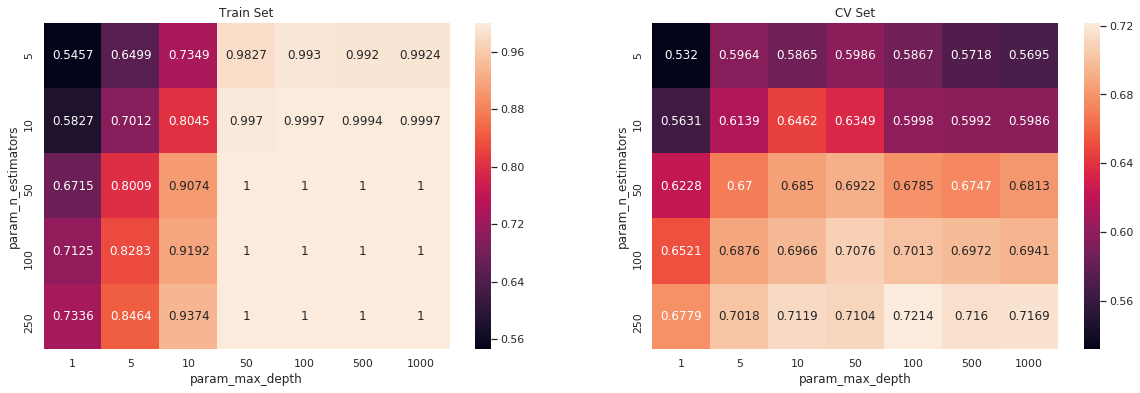

In [86]:
import seaborn as sns; sns.set()


max_scores1 = pd.DataFrame(clf1.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

## B) Train model using the best hyper-parameter value

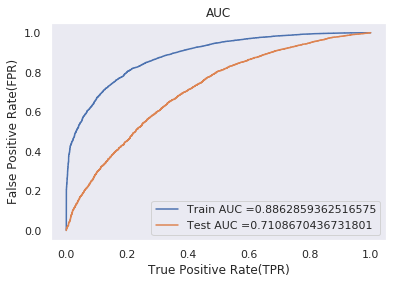

In [87]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = RandomForestClassifier(max_depth = 10, n_estimators =250,class_weight = 'balanced')
model.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positiveclass
# not the predicted outputs
y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

## D) Confusion Matrix

In [85]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

## Train Data

In [89]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999997915341 for threshold 0.477
[[ 1732  1731]
 [  962 18020]]


In [90]:
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999997915341 for threshold 0.477


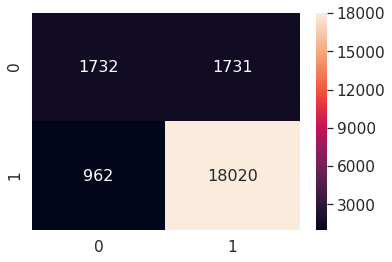

In [91]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

## Test Data

In [92]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999984572938835 for threshold 0.485
[[  897  1649]
 [ 1551 12403]]


In [93]:
conf_matr_df_test_2 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999984572938835 for threshold 0.485


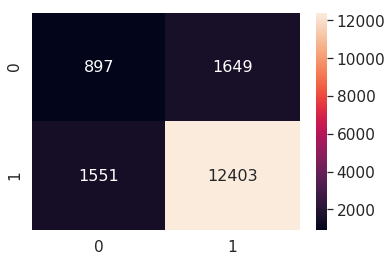

In [94]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_2, annot=True,annot_kws={"size": 16}, fmt='g')

## XG boost 

In [97]:
#https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearnfrom sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

rgb1 = XGBClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 250]}
for i in tqdm(parameters) :
    clf1_xgb = GridSearchCV(rgb1, parameters, cv=2,n_jobs=-1, scoring='roc_auc',return_train_score=True)
    clf1_xgb.fit(X_tr, y_train)

100%|██████████| 2/2 [27:35<00:00, 827.30s/it]


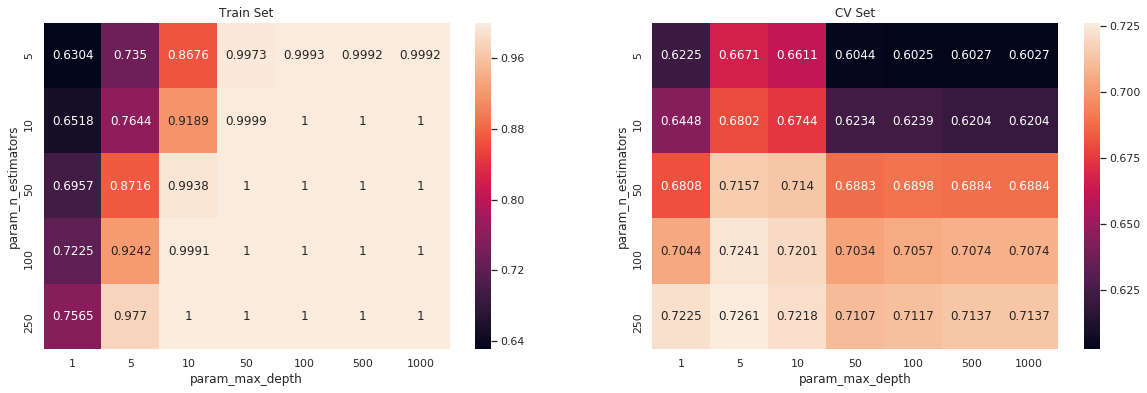

In [98]:
import seaborn as sns; sns.set()


max_scores2 = pd.DataFrame(clf1_xgb.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores2.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores2.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

## Train model using the best hyper-parameter value

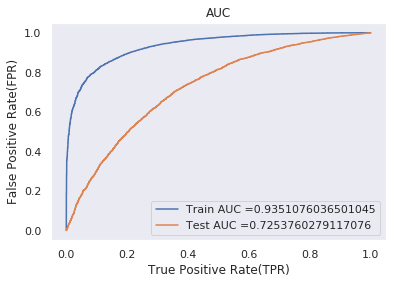

In [99]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = XGBClassifier(max_depth = 5, n_estimators = 250,class_weight = 'balanced')
model.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positiveclass
# not the predicted outputs
y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

## Confusion Matrix (Train data)

In [100]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999997915341 for threshold 0.648
[[ 1732  1731]
 [  454 18528]]


In [101]:
conf_matr_df_train_xgb1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999997915341 for threshold 0.648


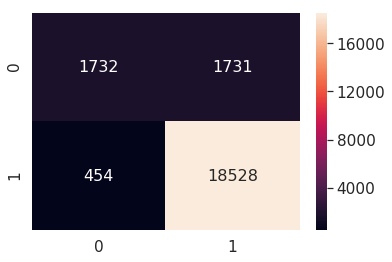

In [102]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_xgb1, annot=True,annot_kws={"size": 16}, fmt='g')

## Test data

In [103]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999984572938835 for threshold 0.682
[[  691  1855]
 [  947 13007]]


In [104]:
conf_matr_df_test_xgb1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999984572938835 for threshold 0.682


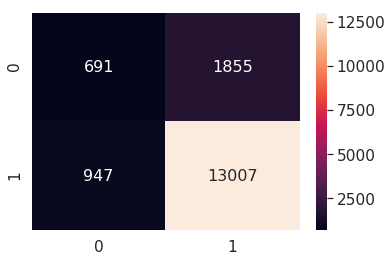

In [105]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_xgb1, annot=True,annot_kws={"size": 16}, fmt='g')

## Set 2 : categorical, numerical features + project_title(TFIDF) + preprocessed_essay (TFIDF)

In [106]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr2 = hstack((X_train_cc_ohe, X_train_csc_ohe,X_train_state_ohe, X_train_grade_ohe,X_train_teacher_ohe, price_train, quantity_train, prev_projects_train, text_tfidf_train, title_tfidf_train)).tocsr()
X_te2 = hstack((X_test_cc_ohe, X_test_csc_ohe,X_test_state_ohe, X_test_grade_ohe,X_test_teacher_ohe, price_test, quantity_test, prev_projects_test, text_tfidf_test, title_tfidf_test)).tocsr()
X_cr2 = hstack((X_cv_cc_ohe, X_cv_csc_ohe,X_cv_state_ohe, X_cv_grade_ohe,X_cv_teacher_ohe, price_cv, quantity_cv, prev_projects_cv,text_tfidf_cv, title_tfidf_cv)).tocsr()


In [107]:
print("Final Data matrix")
print(X_tr2.shape, y_train.shape)
print(X_cr2.shape, y_cv.shape)
print(X_te2.shape, y_test.shape)

Final Data matrix
(22445, 9920) (22445,)
(11055, 9920) (11055,)
(16500, 9920) (16500,)


## GridSearch CV

In [108]:
rfc2 = RandomForestClassifier(class_weight = 'balanced')

parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 250]}
for i in tqdm(parameters):
    clf2 = GridSearchCV(rfc2, parameters, cv= 2, scoring='roc_auc',n_jobs=-1,return_train_score=True)
    clf2.fit(X_tr2, y_train)

100%|██████████| 2/2 [03:39<00:00, 110.71s/it]


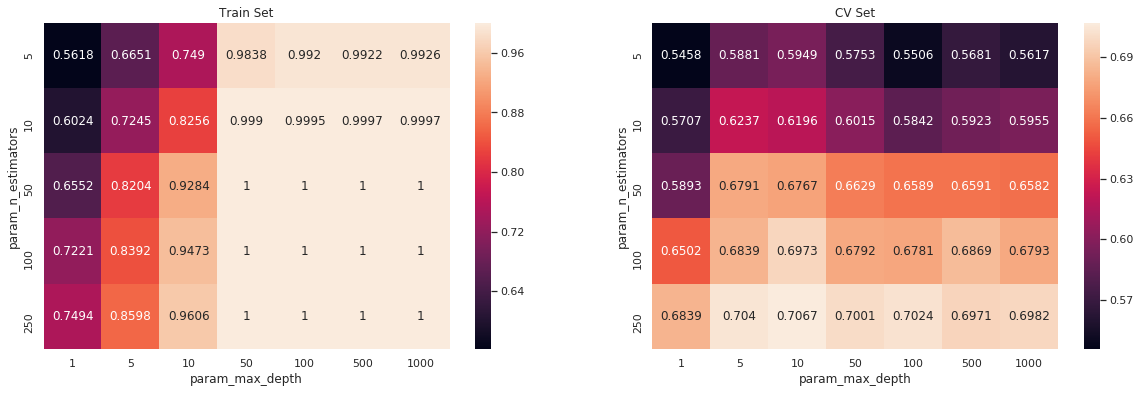

In [109]:
import seaborn as sns; sns.set()


max_scores3 = pd.DataFrame(clf2.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores3.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores3.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

## Train model using the best hyper-parameter value

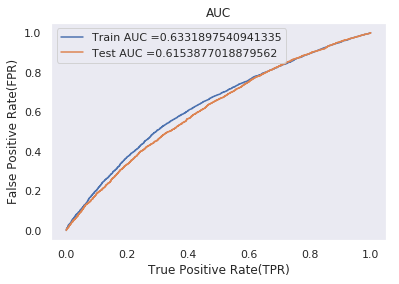

In [110]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = RandomForestClassifier(max_depth = 10, n_estimators = 250,class_weight = 'balanced')
model.fit(X_tr2, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positiveclass
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

## Confusion Matrix -Train data

In [111]:
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999997915341 for threshold 0.5
[[ 1732  1731]
 [ 5936 13046]]


In [112]:
conf_matr_df_train_3 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999997915341 for threshold 0.5


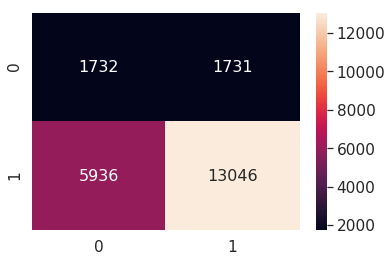

In [113]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_3, annot=True,annot_kws={"size": 16}, fmt='g')

## Test Data

In [114]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.505
[[1540 1006]
 [6153 7801]]


In [115]:
conf_matr_df_test_4 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.505


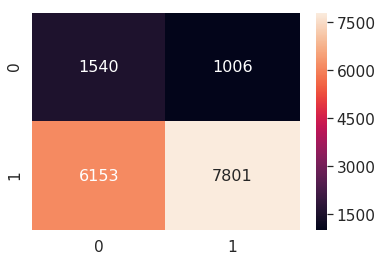

In [116]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_4, annot=True,annot_kws={"size": 16}, fmt='g')

## XG Boost

In [117]:
#https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearnfrom sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

rgb2 = XGBClassifier(class_weight = 'balanced')

for i in tqdm(parameters) :
    parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 250]}

    clf2_xgb = GridSearchCV(rgb2, parameters, cv=2, scoring='roc_auc',n_jobs=-1,return_train_score=True)
    clf2_xgb.fit(X_tr2, y_train)

100%|██████████| 2/2 [45:52<00:00, 1373.11s/it]


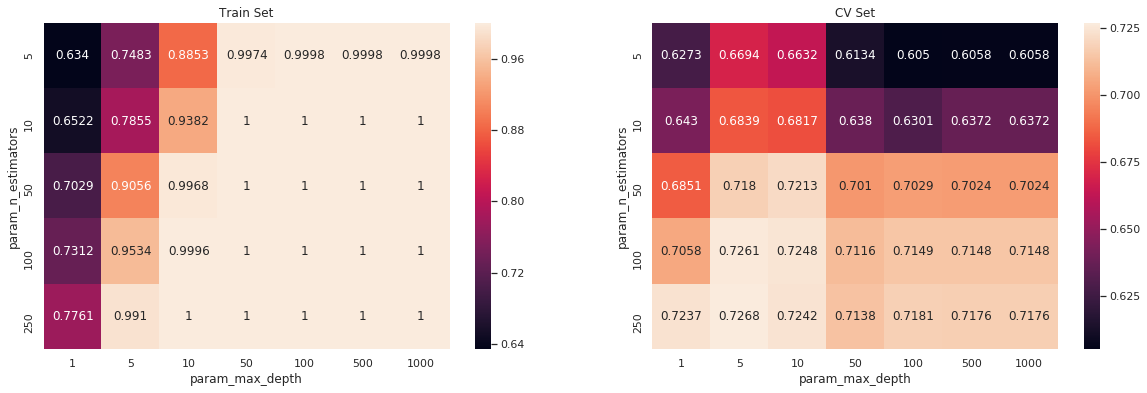

In [118]:
import seaborn as sns; sns.set()


max_scores4 = pd.DataFrame(clf2_xgb.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores4.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores4.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

## Train model using the best hyper-parameter value

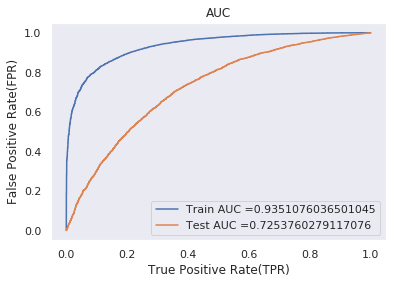

In [119]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = XGBClassifier(max_depth =5, n_estimators = 250,class_weight = 'balanced')
model.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positiveclass
# not the predicted outputs
y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

## Confusion Matrix(Train Data)

In [120]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999997915341 for threshold 0.648
[[ 1732  1731]
 [  454 18528]]


In [121]:
conf_matr_df_train_xgb2 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999997915341 for threshold 0.648


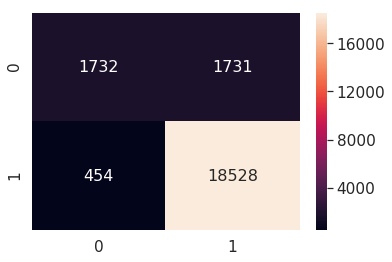

In [122]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_xgb2, annot=True,annot_kws={"size": 16}, fmt='g')

## Test data

In [123]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999984572938835 for threshold 0.682
[[  691  1855]
 [  947 13007]]


In [124]:
conf_matr_df_test_xgb2 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999984572938835 for threshold 0.682


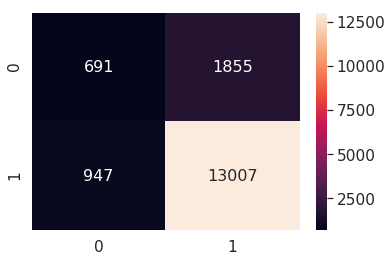

In [125]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_xgb2, annot=True,annot_kws={"size": 16}, fmt='g')

## Set 3 : Categorical, Numerical features + Project_title(AVG W2V) + Preprocessed_essay (AVG W2V)

In [126]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
import numpy as np


X_tr = np.hstack((X_train_cc_ohe, X_train_csc_ohe,X_train_state_ohe, X_train_grade_ohe,X_train_teacher_ohe, price_train, quantity_train, prev_projects_train, avg_w2v_vectors_train, avg_w2v_vectors_titles_train))
X_te = np.hstack((X_test_cc_ohe, X_test_csc_ohe,X_test_state_ohe, X_test_grade_ohe,X_test_teacher_ohe, price_test, quantity_test, prev_projects_test, avg_w2v_vectors_test, avg_w2v_vectors_titles_test))
X_cr = np.hstack((X_cv_cc_ohe, X_cv_csc_ohe,X_cv_state_ohe, X_cv_grade_ohe,X_cv_teacher_ohe, price_cv, quantity_cv, prev_projects_cv, avg_w2v_vectors_cv, avg_w2v_vectors_titles_cv))

In [127]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)

Final Data matrix
(22445, 613) (22445,)
(11055, 613) (11055,)
(16500, 613) (16500,)


## Gridsearch CV

In [128]:
rfc3 = RandomForestClassifier(class_weight = 'balanced')
for i in tqdm(parameters) :
    parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 250]}

    clf3 = GridSearchCV(rfc3, parameters, cv= 2, scoring='roc_auc',n_jobs=-1,return_train_score=True)
    clf3.fit(X_tr, y_train)

100%|██████████| 2/2 [08:59<00:00, 276.78s/it]


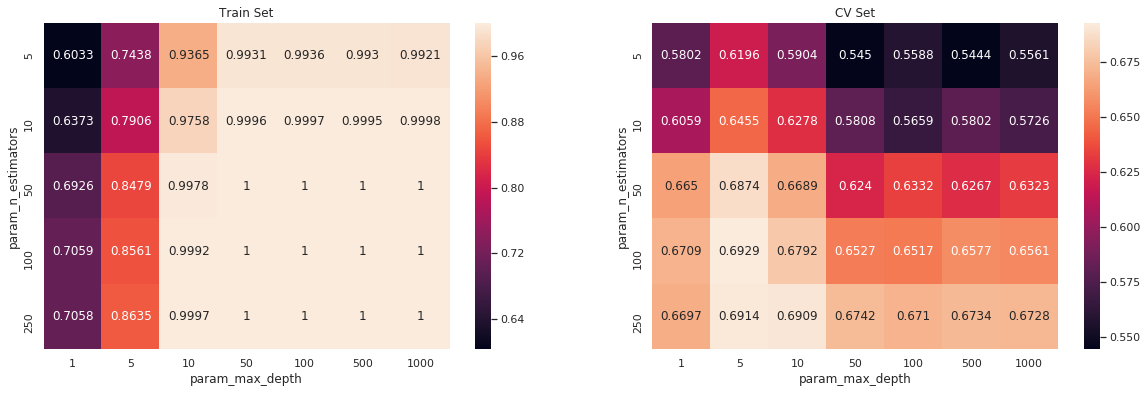

In [129]:
import seaborn as sns; sns.set()


max_scores5 = pd.DataFrame(clf3.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores5.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores5.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

## B) Train the model using the best hyper parameter value

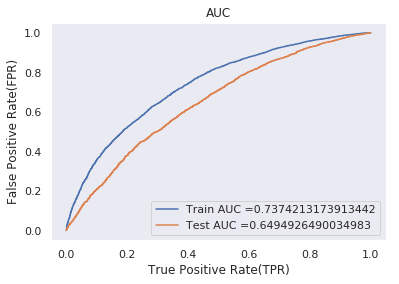

In [130]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = RandomForestClassifier(max_depth = 5, min_samples_split = 100,class_weight = 'balanced')
model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positiveclass
# not the predicted outputs
y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

## C) Confusion Matrix

## Train data

In [131]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999997915341 for threshold 0.473
[[ 1732  1731]
 [ 3361 15621]]


In [132]:
conf_matr_df_train_5 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999997915341 for threshold 0.473


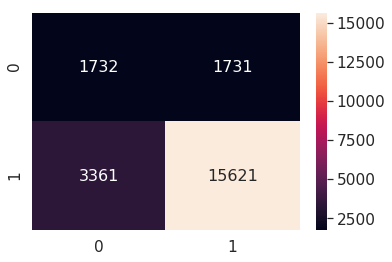

In [133]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_5, annot=True,annot_kws={"size": 16}, fmt='g')

## Test data

In [134]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.5
[[1357 1189]
 [4487 9467]]


In [135]:
conf_matr_df_test_6 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.5


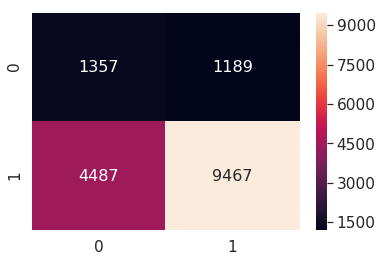

In [136]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_6, annot=True,annot_kws={"size": 16}, fmt='g')

## XGBoost

In [137]:
from xgboost import XGBClassifier

rgb3 = XGBClassifier(class_weight = 'balanced')

for i in tqdm(parameters) :
    parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 250]}

    clf3_xgb = GridSearchCV(rgb3, parameters, cv=2, scoring='roc_auc',n_jobs=-1,return_train_score=True)
    clf3_xgb.fit(X_tr, y_train)

100%|██████████| 2/2 [1:25:58<00:00, 2578.62s/it]


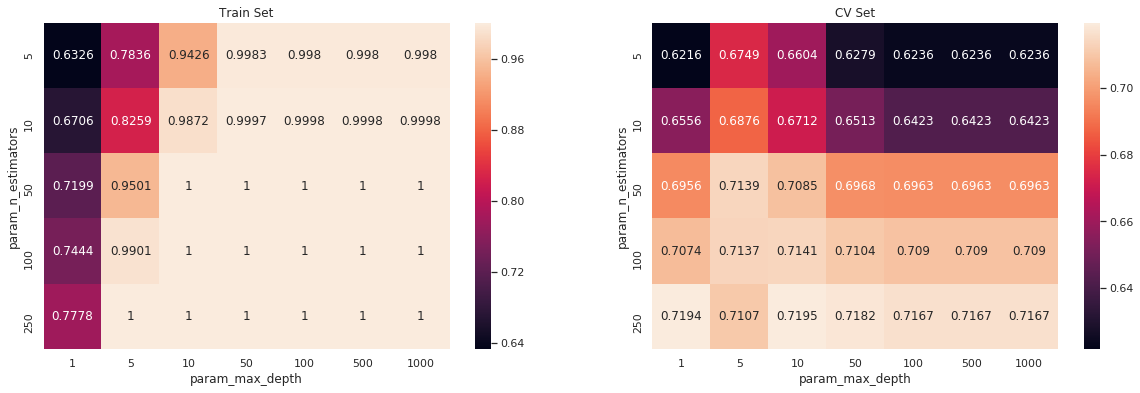

In [138]:
import seaborn as sns; sns.set()


max_scores6 = pd.DataFrame(clf3_xgb.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores6.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores6.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

## Train the model using the best hyper parameter value

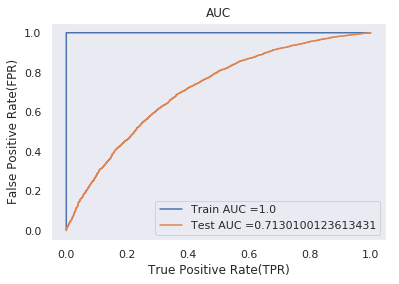

In [139]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = XGBClassifier(max_depth = 10, n_estimators = 250,class_weight = 'balanced')
model.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positiveclass
# not the predicted outputs
y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

## Confusion matrix(test data)

In [140]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.23689064270787533 for threshold 0.024
[[ 2128  1335]
 [    0 18982]]


In [141]:
conf_matr_df_train_xgb3 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.23689064270787533 for threshold 0.024


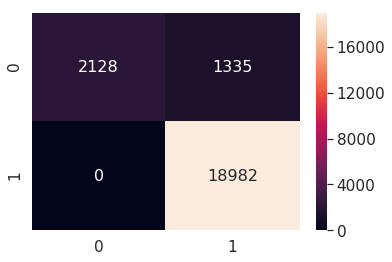

In [142]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_xgb3, annot=True,annot_kws={"size": 16}, fmt='g')

## Train data

In [143]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.996
[[ 2299   247]
 [10152  3802]]


In [144]:
conf_matr_df_test_xgb3 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.996


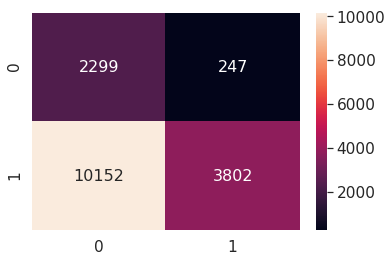

In [145]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_xgb3, annot=True,annot_kws={"size": 16}, fmt='g')

## Set 4 : Categorical, Numerical features + Project_title(TFIDF W2V) + Preprocessed_essay (TFIDF W2V)

In [87]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
import numpy as np
X_tr = np.hstack((X_train_cc_ohe, X_train_csc_ohe,X_train_state_ohe, X_train_grade_ohe,X_train_teacher_ohe, price_train, quantity_train, prev_projects_train, tfidf_w2v_vectors_train,tfidf_w2v_vectors_titles_train))
X_te = np.hstack((X_test_cc_ohe, X_test_csc_ohe,X_test_state_ohe, X_test_grade_ohe,X_test_teacher_ohe, price_test, quantity_test, prev_projects_test, tfidf_w2v_vectors_test, tfidf_w2v_vectors_titles_test))
X_cr = np.hstack((X_cv_cc_ohe, X_cv_csc_ohe,X_cv_state_ohe, X_cv_grade_ohe,X_cv_teacher_ohe, price_cv, quantity_cv, prev_projects_cv,tfidf_w2v_vectors_cv, tfidf_w2v_vectors_titles_cv))

In [88]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)

Final Data matrix
(22445, 613) (22445,)
(11055, 613) (11055,)
(16500, 613) (16500,)


## GridSearchCV

In [149]:
rfc4 = RandomForestClassifier(class_weight = 'balanced')
for i in tqdm(parameters) :
    parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 250]}
    clf4 = GridSearchCV(rfc4, parameters, cv= 2, scoring='roc_auc',n_jobs=-1,return_train_score=True)
    clf4.fit(X_tr, y_train)

100%|██████████| 2/2 [09:28<00:00, 284.44s/it]


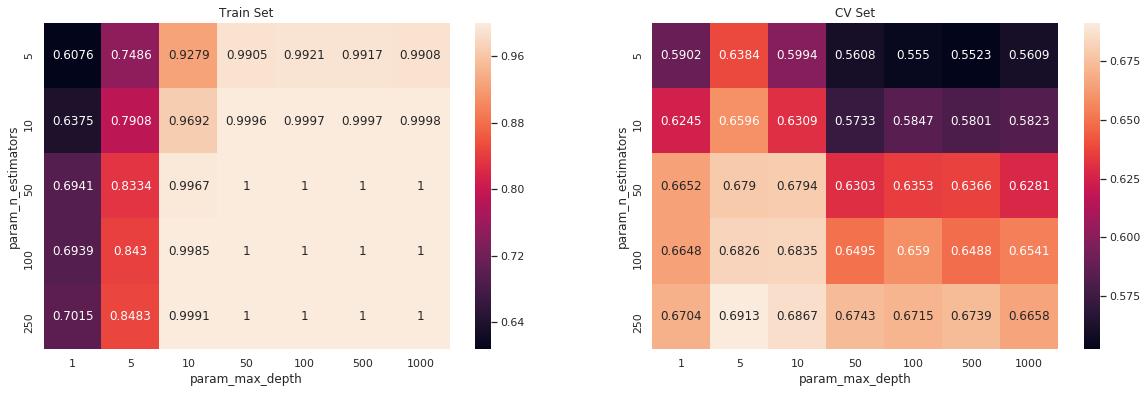

In [150]:
import seaborn as sns; sns.set()


max_scores7 = pd.DataFrame(clf4.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores7.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores7.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

## Train the model using the best hyper parameter value

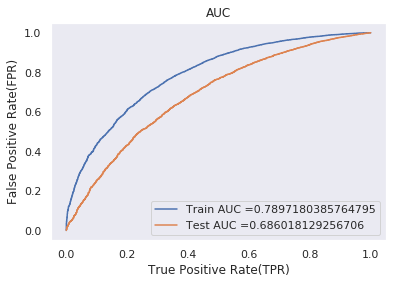

In [151]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = RandomForestClassifier(max_depth = 5, n_estimators = 250,class_weight = 'balanced')
model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positiveclass
# not the predicted outputs
y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

## Confusion Matrix

In [152]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999997915341 for threshold 0.467
[[ 1732  1731]
 [ 2243 16739]]


In [153]:
conf_matr_df_train_7 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999997915341 for threshold 0.467


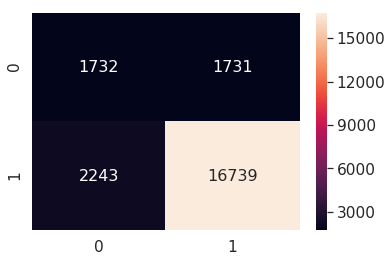

In [154]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_7, annot=True,annot_kws={"size": 16}, fmt='g')

In [155]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.49
[[ 1317  1229]
 [ 3421 10533]]


In [156]:
conf_matr_df_test_8 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.49


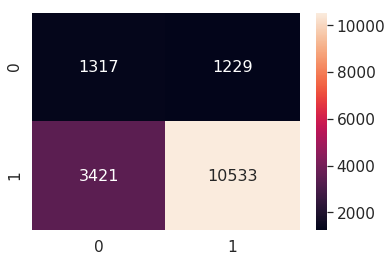

In [157]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_8, annot=True,annot_kws={"size": 16}, fmt='g')

## XGBoost

In [89]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

rgb4 = XGBClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 250]}
for i in tqdm(parameters) :
    

    clf4_xgb = GridSearchCV(rgb4, parameters, cv=2, scoring='roc_auc',n_jobs=-1,return_train_score=True)
    clf4_xgb.fit(X_tr, y_train)

100%|██████████| 2/2 [1:02:01<00:00, 1864.74s/it]


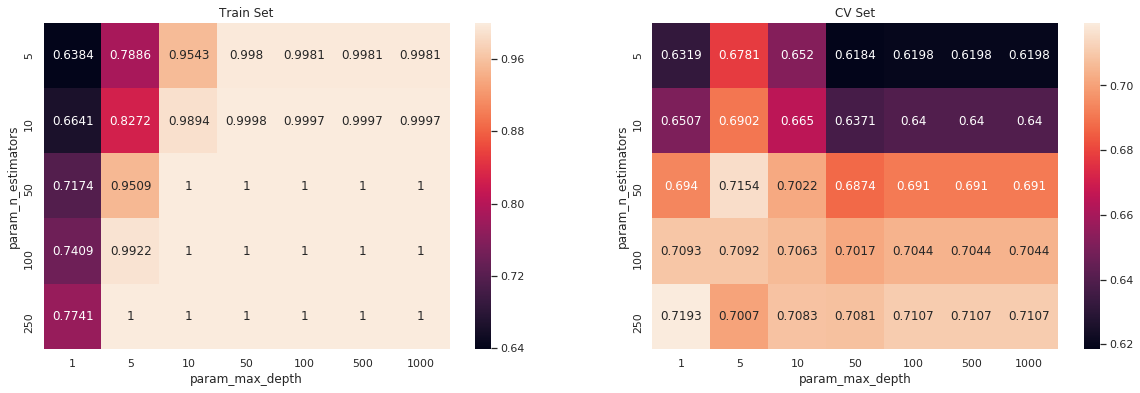

In [90]:
import seaborn as sns; sns.set()


max_scores8 = pd.DataFrame(clf4_xgb.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores8.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores8.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

## Train Model using best Hyperparameter Value 

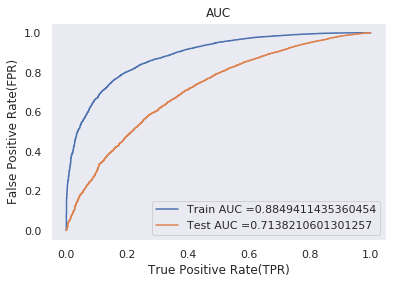

In [95]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = XGBClassifier(max_depth = 5, n_estimators = 50,class_weight = 'balanced')
model.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()


## Confusion Matrix

In [96]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999997915341 for threshold 0.716
[[ 1732  1731]
 [  926 18056]]


In [97]:
conf_matr_df_train_xgb4 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999997915341 for threshold 0.716


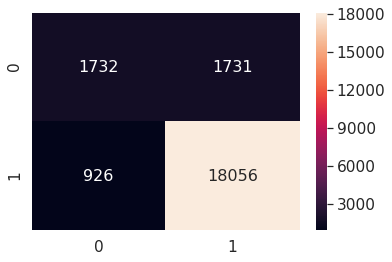

In [98]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_xgb4, annot=True,annot_kws={"size": 16}, fmt='g')

In [99]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.765
[[ 1011  1535]
 [ 1946 12008]]


In [100]:
conf_matr_df_test_xgb4 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.765


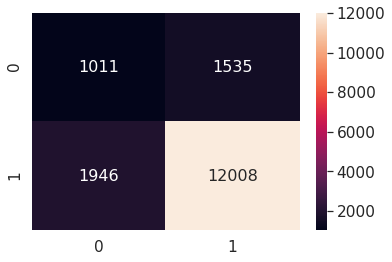

In [101]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_xgb4, annot=True,annot_kws={"size": 16}, fmt='g')

In [103]:
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Depth:Hyper Parameter","Estimators:Hyper Parameter", "AUC"]

x.add_row(["BOW", "Random forest",10,250 ,0.71])
x.add_row(["BOW", "XGBoost", 5,250, 0.725])
x.add_row(["TFIDF", "Random forest", 10,250, 0.615])
x.add_row(["TFIDF", "XGBoost", 5,250, 0.725])
x.add_row(["AVG W2V", "Random forest", 5,250, 0.649])
x.add_row(["AVG W2V", "XGBoost", 10,250, 0.713])
x.add_row(["TFIDF W2V", "Random forest", 5,250, 0.686])
x.add_row(["TFIDF W2V", "XGBoost", 5,250, 0.71])



print(x)

+------------+---------------+-----------------------+----------------------------+-------+
| Vectorizer |     Model     | Depth:Hyper Parameter | Estimators:Hyper Parameter |  AUC  |
+------------+---------------+-----------------------+----------------------------+-------+
|    BOW     | Random forest |           10          |            250             |  0.71 |
|    BOW     |    XGBoost    |           5           |            250             | 0.725 |
|   TFIDF    | Random forest |           10          |            250             | 0.615 |
|   TFIDF    |    XGBoost    |           5           |            250             | 0.725 |
|  AVG W2V   | Random forest |           5           |            250             | 0.649 |
|  AVG W2V   |    XGBoost    |           10          |            250             | 0.713 |
| TFIDF W2V  | Random forest |           5           |            250             | 0.686 |
| TFIDF W2V  |    XGBoost    |           5           |            250           